In [48]:
# Importing basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from tqdm import tqdm

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# importing data sample csv into dataframe and dropping useless column
input_df = pd.read_csv('data/data_sample.csv')
input_df = input_df.drop(['Unnamed: 0'],axis=1)

In [3]:
# tranform string variables to time and calculate new variable, view_duration(s)

input_df['view_start_time'] = pd.to_datetime(input_df['view_start_time'])
input_df['view_end_time'] = pd.to_datetime(input_df['view_end_time'])
input_df['view_duration(s)'] = input_df['view_end_time'] - input_df['view_start_time']

input_df['view_duration(s)'] = input_df['view_duration(s)'].dt.total_seconds().astype(int)

In [4]:
# function to add more detail on the time stamp, year, month and day as separate columns
def convert_string_to_date_time(date_str):
    date_ = datetime.strptime(date_str, '%Y-%m-%d').date()

    return date_

def get_year(x):
    return x.year

def get_month(x):
    return x.month

def get_day(x):
    return x.day


In [5]:
input_df['log_date_dt']=  input_df['log_date'].apply(convert_string_to_date_time)
input_df['log_date_year'] = input_df['log_date_dt'].apply(get_year)
input_df['log_date_month'] = input_df['log_date_dt'].apply(get_month)
input_df['log_date_day'] = input_df['log_date_dt'].apply(get_day)

In [6]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [7]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23242 entries, 0 to 23241
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   episode_type      23242 non-null  object        
 1   episode_id        23242 non-null  object        
 2   show_id           23242 non-null  object        
 3   user_id           23235 non-null  object        
 4   log_date          23242 non-null  object        
 5   view_start_time   23242 non-null  datetime64[ns]
 6   view_end_time     23242 non-null  datetime64[ns]
 7   view_percent      23242 non-null  float64       
 8   log_day_sequence  23242 non-null  int64         
 9   view_duration(s)  23242 non-null  int64         
 10  log_date_dt       23242 non-null  object        
 11  log_date_year     23242 non-null  int64         
 12  log_date_month    23242 non-null  int64         
 13  log_date_day      23242 non-null  int64         
dtypes: datetime64[ns](2), 

## Well there are 7 NaN `user_id` entries, what to do?

1. replace the missing `user_id` with dummy one. No merit
2. Just drop the entries with no `user_id`, after all, it is not possible to now which user those records correspond to

In [8]:
# the null and nan are seem as the same
null_user = input_df.isnull().any()
null_count = input_df.isnull().sum()
null_rows = input_df[input_df.isnull().any(axis=1)]

nan_user = input_df.isna().any()
nan_count = input_df.isna().sum()
nan_rows = input_df[input_df.isna().any(axis=1)]

In [9]:
input_df['user_id'].unique()

array(['uu00000002', 'uu00000016', 'uu00000049', 'uu00000050',
       'uu00000056', 'uu00000072', 'uu00000079', 'uu00000092',
       'uu00000109', 'uu00000115', 'uu00000116', 'uu00000121',
       'uu00000122', 'uu00000143', 'uu00000148', 'uu00000169',
       'uu00000179', 'uu00000190', 'uu00000196', 'uu00000212',
       'uu00000231', 'uu00000252', 'uu00000261', 'uu00000265',
       'uu00000270', 'uu00000343', 'uu00000344', 'uu00000346',
       'uu00000348', 'uu00000366', 'uu00000371', 'uu00000373',
       'uu00000404', 'uu00000435', 'uu00000443', 'uu00000463',
       'uu00000464', 'uu00000488', 'uu00000506', 'uu00000513',
       'uu00000530', 'uu00000531', 'uu00000538', 'uu00000545',
       'uu00000574', 'uu00000617', 'uu00000650', 'uu00000654',
       'uu00000663', 'uu00000675', 'uu00000689', 'uu00000705',
       'uu00000708', 'uu00000746', 'uu00000747', 'uu00000793',
       'uu00000797', 'uu00000828', 'uu00000854', 'uu00000857',
       'uu00000873', 'uu00000896', 'uu00000919', 'uu000

In [10]:
pd.DataFrame(input_df.isna().sum()).reset_index().rename(columns={'index':'user_features', 0:'number_of_missing'})

,user_features,number_of_missing
0,episode_type,0
1,episode_id,0
2,show_id,0
3,user_id,7
4,log_date,0
5,view_start_time,0
6,view_end_time,0
7,view_percent,0
8,log_day_sequence,0
9,view_duration(s),0


In [11]:
input_df_cleaned = input_df.dropna()
input_df_cleaned.describe()

,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day
count,23235,23235,23235.000000,23235.000000,23235.000000,23235.0,23235.000000,23235.000000
mean,2024-02-28 01:10:59.407531264,2024-02-28 01:12:41.614331904,38.596778,6.802841,102.206800,2024.0,2.434732,14.843770
min,2024-02-01 02:07:48,2024-02-01 02:09:09,0.000000,1.000000,0.000000,2024.0,2.000000,1.000000
25%,2024-02-18 19:00:16.500000,2024-02-18 19:01:19.500000,7.692000,1.000000,34.000000,2024.0,2.000000,7.000000
50%,2024-02-27 23:45:28,2024-02-27 23:46:23,32.143000,4.000000,83.000000,2024.0,2.000000,15.000000
75%,2024-03-07 15:15:24.500000,2024-03-07 15:16:26,63.158000,10.000000,139.000000,2024.0,3.000000,22.000000
max,2024-04-01 11:00:36,2024-04-01 11:01:03,495.238000,32.000000,15562.000000,2024.0,4.000000,30.000000
std,NaN,NaN,34.071763,6.853733,175.590864,0.0,0.496080,8.471257


In [12]:
# description of the object (categorical) data types
input_df_cleaned.describe(include=['O'])

,episode_type,episode_id,show_id,user_id,log_date,log_date_dt
count,23235,23235,23235,23235,23235,23235
unique,3,7275,384,999,60,60
top,b,ep00000005,s00000004,uu00000043,2024-03-03,2024-03-03
freq,13684,408,2253,1226,854,854


In [13]:
input_df_cleaned[['user_id', 'log_date']].drop_duplicates().shape


(2936, 2)

In [14]:
# removing duplicate user entry
# this is to confirm the problem preliminary conditions: 60% of users logging only once
unique_user = input_df_cleaned[['user_id','log_date','log_day_sequence']].drop_duplicates()
# then i didnt understand this
unique_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2936 entries, 0 to 23233
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           2936 non-null   object
 1   log_date          2936 non-null   object
 2   log_day_sequence  2936 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.8+ KB


In [15]:
unique_user.shape

(2936, 3)

In [16]:
unique_user.nunique()

user_id             999
log_date             60
log_day_sequence     32
dtype: int64

In [17]:
unique_user.head()

,user_id,log_date,log_day_sequence
0,uu00000002,2024-02-01,1
1,uu00000016,2024-02-02,1
2,uu00000049,2024-02-03,1
3,uu00000050,2024-02-03,1
5,uu00000056,2024-02-04,1


In [18]:
unique_user[unique_user['log_day_sequence'] == 1]

,user_id,log_date,log_day_sequence
0,uu00000002,2024-02-01,1
1,uu00000016,2024-02-02,1
2,uu00000049,2024-02-03,1
3,uu00000050,2024-02-03,1
5,uu00000056,2024-02-04,1
...,...,...,...
22792,uu00000731,2024-02-28,1
22803,uu00000770,2024-02-29,1
22814,uu00000790,2024-03-01,1
22971,uu00000888,2024-03-07,1


In [19]:
unique_user[unique_user['log_day_sequence'] == 1]

,user_id,log_date,log_day_sequence
0,uu00000002,2024-02-01,1
1,uu00000016,2024-02-02,1
2,uu00000049,2024-02-03,1
3,uu00000050,2024-02-03,1
5,uu00000056,2024-02-04,1
...,...,...,...
22792,uu00000731,2024-02-28,1
22803,uu00000770,2024-02-29,1
22814,uu00000790,2024-03-01,1
22971,uu00000888,2024-03-07,1


In [20]:
unique_user[unique_user['log_day_sequence'] > 1]

,user_id,log_date,log_day_sequence
17,uu00000169,2024-03-07,2
20,uu00000190,2024-03-08,2
22,uu00000212,2024-02-17,3
25,uu00000261,2024-02-19,8
26,uu00000265,2024-02-18,2
...,...,...,...
22782,uu00000687,2024-03-04,2
22799,uu00000739,2024-03-04,6
22964,uu00000848,2024-03-15,8
22968,uu00000871,2024-03-05,2


In [21]:
# in the unique users df
# there 999 rows corresponding to log_day_squence == 1 and 1937 row where log_day_sequence > 1
999/2936
# so let's say the accurate proportion of unique users that 

0.3402588555858311

In [22]:
# created column filled with ones to tag users logged in only once
unique_user['count']=1

In [23]:
unique_user[unique_user['user_id'] == 'uu00000005']

,user_id,log_date,log_day_sequence,count
1110,uu00000005,2024-02-01,1,1
7200,uu00000005,2024-02-02,2,1
7208,uu00000005,2024-02-04,3,1
7210,uu00000005,2024-02-05,4,1
7211,uu00000005,2024-02-06,5,1
7214,uu00000005,2024-02-07,6,1
7222,uu00000005,2024-02-08,7,1
7223,uu00000005,2024-02-15,8,1
7225,uu00000005,2024-02-18,9,1


In [24]:
unique_user_group = unique_user[['user_id','count']].groupby(['user_id']).sum().reset_index()
unique_user_group.head()

,user_id,count
0,uu00000002,1
1,uu00000003,1
2,uu00000004,1
3,uu00000005,9
4,uu00000006,3


In [25]:
unique_user_ar = unique_user_group['count'].value_counts()
unique_user_ar.index.name = 'user_loging_per_day'

In [26]:
unique_user_df = unique_user_ar.reset_index()

In [27]:
#first_userg = first_userg['count'].value_counts().reset_index().rename(columns={'index':'user_loging_per_day'})

In [28]:
unique_user_df.columns

Index(['user_loging_per_day', 'count'], dtype='object')

In [29]:
unique_user_df[unique_user_df['user_loging_per_day']==1]['count']/unique_user_df['count'].sum()

0    0.612613
Name: count, dtype: float64

In [30]:
first_userg_df[first_userg_df['user_loging_per_day']==1]['count']/first_userg_df['count'].sum()

NameError: name 'first_userg_df' is not defined

In [31]:
user_log = input_df[['user_id', 'log_date', 'log_day_sequence']].drop_duplicates()
once_user = user_log[user_log['log_day_sequence'] == 1]
user_log.describe()

,log_day_sequence
count,2937.000000
mean,5.636023
std,6.148755
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,32.000000


In [32]:
1000/2937

0.34048348655090227

In [33]:
first_userg

NameError: name 'first_userg' is not defined

In [34]:
first_userg_df['count'].sum()

NameError: name 'first_userg_df' is not defined

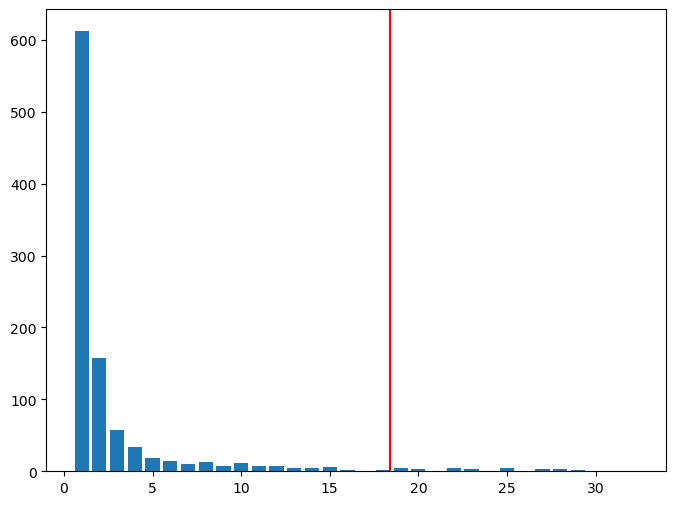

In [35]:
plt.subplots(figsize=(8, 6)) 
plt.bar(unique_user_df['user_loging_per_day'], unique_user_df['count'])
threshold = np.percentile(unique_user_df['user_loging_per_day'], 60)

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')

plt.show()
# # Add labels and title
# plt.xlabel('Values')
# plt.ylabel('Categories')
# plt.title('Horizontal Bar Plot')

NameError: name 'first_userg_df' is not defined

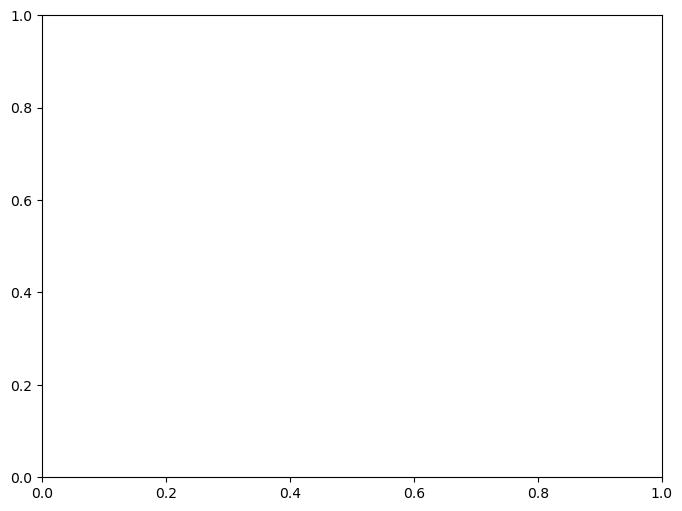

In [36]:
plt.subplots(figsize=(8, 6)) 
plt.bar(first_userg_df['user_loging_per_day'], first_userg_df['count'])
threshold = np.percentile(first_userg_df['user_loging_per_day'], 60)

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')

plt.show()

In [37]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [38]:
input_df[input_df['view_percent']==0]

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.0,1,14,2024-02-01,2024,2,1
6,a,ep00000002,s00000002,uu00000072,2024-02-04,2024-02-04 13:13:39,2024-02-04 13:14:04,0.0,1,25,2024-02-04,2024,2,4
7,a,ep00000002,s00000002,uu00000079,2024-02-05,2024-02-05 20:43:55,2024-02-05 20:44:00,0.0,1,5,2024-02-05,2024,2,5
14,a,ep00000002,s00000002,uu00000143,2024-02-08,2024-02-08 11:03:24,2024-02-08 11:03:31,0.0,1,7,2024-02-08,2024,2,8
18,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.0,2,5,2024-03-07,2024,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23130,c,ep00007177,s00000165,uu00000962,2024-03-24,2024-03-24 13:11:19,2024-03-24 13:11:54,0.0,3,35,2024-03-24,2024,3,24
23131,c,ep00007178,s00000165,uu00000962,2024-03-23,2024-03-23 16:09:24,2024-03-23 16:10:11,0.0,2,47,2024-03-23,2024,3,23
23144,c,ep00007185,s00000165,uu00000962,2024-03-24,2024-03-24 09:56:37,2024-03-24 09:56:52,0.0,3,15,2024-03-24,2024,3,24
23184,c,ep00007209,s00000163,uu00000962,2024-03-24,2024-03-24 22:36:26,2024-03-24 22:36:42,0.0,3,16,2024-03-24,2024,3,24


In [53]:
input_df['episode_type'].nunique(), input_df['episode_id'].nunique(), input_df['show_id'].nunique()

(3, 7275, 384)

In [54]:
# What is the similarities
# between users currently loggin in more than once?
# input_df for at least one time 

In [55]:
feature_key = input_df[['episode_type','episode_id','show_id']].drop_duplicates().reset_index(drop=True)

In [56]:
feature_key.shape

(7762, 3)

In [57]:
feature_key.head()

,episode_type,episode_id,show_id
0,a,ep00000002,s00000002
1,a,ep00000003,s00000003
2,a,ep00000004,s00000003
3,a,ep00000005,s00000004
4,a,ep00000007,s00000004


In [58]:
user_unique = input_df['user_id'].unique()

In [101]:
new_user_list =[]

for user in tqdm(user_unique):
    
    new_tmp = feature_key.copy()
    new_tmp['user_id'] = user
    
    new_user_list.append(new_tmp)
    
    
new_user_df = pd.concat(new_user_list)

100%|████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9667.70it/s]


In [102]:
new_user_df.head()

,episode_type,episode_id,show_id,user_id
0,a,ep00000002,s00000002,uu00000002
1,a,ep00000003,s00000003,uu00000002
2,a,ep00000004,s00000003,uu00000002
3,a,ep00000005,s00000004,uu00000002
4,a,ep00000007,s00000004,uu00000002


In [103]:
new_user_df.shape

(7762000, 4)

In [104]:
999*7762

7754238

In [105]:
input_df[['episode_type','episode_id','show_id','user_id','view_percent']].groupby(['episode_type', 'episode_id', 'show_id', 'user_id']).sum().reset_index()

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.000
1,a,ep00000002,s00000002,uu00000016,9.091
2,a,ep00000002,s00000002,uu00000049,9.091
3,a,ep00000002,s00000002,uu00000050,36.364
4,a,ep00000002,s00000002,uu00000056,22.727
...,...,...,...,...,...
16991,c,ep00007268,s00000113,uu00000987,82.609
16992,c,ep00007269,s00000113,uu00000987,85.000
16993,c,ep00007270,s00000113,uu00000987,68.421
16994,c,ep00007271,s00000113,uu00000987,63.158


In [106]:
new_user_df = pd.merge(new_user_df,
                       input_df[['episode_type','episode_id','show_id','user_id','view_percent']].groupby(['episode_type', 'episode_id', 'show_id', 'user_id']).sum().reset_index(), # add filter here 
                       on = ['episode_type','episode_id','show_id','user_id'],
                       how ='left'
                      )

In [107]:
new_user_df['view_percent'] = new_user_df['view_percent'].fillna(0)

In [108]:
new_user_df.shape

(7762000, 5)

In [109]:
new_user_df .head()

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.0
1,a,ep00000003,s00000003,uu00000002,0.0
2,a,ep00000004,s00000003,uu00000002,0.0
3,a,ep00000005,s00000004,uu00000002,0.0
4,a,ep00000007,s00000004,uu00000002,0.0


In [110]:
first_time_users = input_df[input_df['log_day_sequence']==1]['user_id'].unique()
first_time_more = input_df[input_df['log_day_sequence']>2]['user_id'].unique()

In [111]:
# new_user_f = new_user_df [new_user_df ['user_id'].isin(first_time_users)]
# new_user_sec = new_user_df [new_user_df ['user_id'].isin(first_time_sec)]

In [112]:
# new_user_df[new_user_df['view_percent']>0]['user_id'].unique()

In [113]:
user_unique[:2]

array(['uu00000002', 'uu00000016'], dtype=object)

In [114]:
user_a = new_user_df[new_user_df['user_id']=='uu00000002']
user_b = new_user_df[new_user_df['user_id']=='uu00000050']

In [115]:
#uu00000002 uu00000050
user_a.isna().sum()

episode_type    0
episode_id      0
show_id         0
user_id         0
view_percent    0
dtype: int64

In [116]:
user_a['episode_type'].nunique(), user_a['episode_id'].nunique(), user_a['show_id'].nunique()

(3, 7275, 384)

In [117]:
user_b['episode_type'].nunique(), user_b['episode_id'].nunique(), user_b['show_id'].nunique()

(3, 7275, 384)

In [118]:
user_b[['episode_type', 'episode_id', 'show_id']].drop_duplicates().shape

(7762, 3)

In [119]:
user_a.drop_duplicates().shape

(7762, 5)

In [120]:
user_b.isna().sum()

episode_type    0
episode_id      0
show_id         0
user_id         0
view_percent    0
dtype: int64

In [121]:
user_a.shape,user_b.shape

((7762, 5), (7762, 5))

In [122]:
user_a[user_a['view_percent']>0].shape,user_b[user_b['view_percent']>0].shape

((0, 5), (11, 5))

In [123]:


def cosine_sim(a, b):
    # if
    """Calculates the cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# # Example usage
# vector1 = [1, 2, 3]
# vector2 = [4, 5, 6]

# similarity = cosine_sim(vector1, vector2)
# print("Cosine similarity:", similarity)

In [124]:
cosine_sim(user_a['view_percent'].to_list(), user_b['view_percent'].to_list())

/tmp/ipykernel_313612/2207212296.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


nan

In [125]:
# from sklearn.metrics.pairwise import cosine_similarity

# vector1 = [[1, 2, 3]]  # Note: 2D array required for sklearn
# vector2 = [[4, 5, 6]]

# similarity = cosine_similarity(vector1, vector2)
# print("Cosine similarity:", similarity[0][0])

In [139]:
input_df[input_df['user_id'] == 'uu00000002']

(  episode_type  episode_id    show_id     user_id    log_date  \
 0            a  ep00000002  s00000002  uu00000002  2024-02-01   
 
       view_start_time       view_end_time  view_percent  log_day_sequence  \
 0 2024-02-01 12:13:10 2024-02-01 12:13:24           0.0                 1   
 
    view_duration(s) log_date_dt  log_date_year  log_date_month  log_date_day  
 0                14  2024-02-01           2024               2             1  ,
       episode_type  episode_id    show_id     user_id    log_date  \
 3                a  ep00000002  s00000002  uu00000050  2024-02-03   
 4                a  ep00000002  s00000002  uu00000050  2024-02-03   
 1250             a  ep00000075  s00000002  uu00000050  2024-02-03   
 1251             a  ep00000075  s00000002  uu00000050  2024-02-03   
 1252             a  ep00000075  s00000002  uu00000050  2024-02-03   
 1375             a  ep00000080  s00000014  uu00000050  2024-02-12   
 1648             a  ep00000089  s00000002  uu00000050  2

In [140]:
input_df[input_df['user_id'] == 'uu00000050']

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3
1250,a,ep00000075,s00000002,uu00000050,2024-02-03,2024-02-03 16:46:33,2024-02-03 16:46:53,0.000,1,20,2024-02-03,2024,2,3
1251,a,ep00000075,s00000002,uu00000050,2024-02-03,2024-02-03 16:47:40,2024-02-03 16:48:28,23.529,1,48,2024-02-03,2024,2,3
1252,a,ep00000075,s00000002,uu00000050,2024-02-03,2024-02-03 20:50:35,2024-02-03 20:51:24,17.647,1,49,2024-02-03,2024,2,3
1375,a,ep00000080,s00000014,uu00000050,2024-02-12,2024-02-12 01:37:27,2024-02-12 01:38:56,26.316,4,89,2024-02-12,2024,2,12
1648,a,ep00000089,s00000002,uu00000050,2024-02-03,2024-02-03 20:53:33,2024-02-03 20:54:57,37.500,1,84,2024-02-03,2024,2,3
1719,a,ep00000090,s00000002,uu00000050,2024-02-03,2024-02-03 20:51:25,2024-02-03 20:53:32,61.111,1,127,2024-02-03,2024,2,3
1808,a,ep00000091,s00000002,uu00000050,2024-02-03,2024-02-03 20:54:58,2024-02-03 20:56:39,27.273,1,101,2024-02-03,2024,2,3
4146,a,ep00001415,s00000014,uu00000050,2024-02-12,2024-02-12 01:38:56,2024-02-12 01:41:23,60.000,4,147,2024-02-12,2024,2,12


In [141]:
cosine_sim(tmp_a, tmp_b)

/tmp/ipykernel_313612/2207212296.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


nan

In [ ]:
user_aa = []
user_bb = []
simi_l = []

for user_a in input_df[input_df['log_day_sequence'] == 1]['user_id'].unique():
    for user_b in input_df['user_id'].unique():
       print(user_a, user_b)   
       tmp_a = new_user_df[new_user_df['user_id'] == user_a]['view_percent'].to_list()
       tmp_b = new_user_df[new_user_df['user_id'] == user_b]['view_percent'].to_list()
       if(tmp_a is not np.nan) and (tmp_b is not np.nan):
           if(sum(tmp_a) != 0) and (sum(tmp_b) != 0):
               sim = cosine_sim(tmp_a, tmp_b)
               user_aa.append(user_a)
               user_bb.append(user_b)
               simi_l.append(sim)

df_simi = pd.DataFrame({'user_id_a':user_aa,'user_id_b':user_bb, 'cos_sim':simi_l})

uu00000002 uu00000002
uu00000002 uu00000016
uu00000002 uu00000049
uu00000002 uu00000050
uu00000002 uu00000056
uu00000002 uu00000072
uu00000002 uu00000079
uu00000002 uu00000092
uu00000002 uu00000109
uu00000002 uu00000115
uu00000002 uu00000116
uu00000002 uu00000121
uu00000002 uu00000122
uu00000002 uu00000143
uu00000002 uu00000148
uu00000002 uu00000169
uu00000002 uu00000179
uu00000002 uu00000190
uu00000002 uu00000196
uu00000002 uu00000212
uu00000002 uu00000231
uu00000002 uu00000252
uu00000002 uu00000261
uu00000002 uu00000265
uu00000002 uu00000270
uu00000002 uu00000343
uu00000002 uu00000344
uu00000002 uu00000346
uu00000002 uu00000348
uu00000002 uu00000366
uu00000002 uu00000371
uu00000002 uu00000373
uu00000002 uu00000404
uu00000002 uu00000435
uu00000002 uu00000443
uu00000002 uu00000463
uu00000002 uu00000464
uu00000002 uu00000488
uu00000002 uu00000506
uu00000002 uu00000513
uu00000002 uu00000530
uu00000002 uu00000531
uu00000002 uu00000538
uu00000002 uu00000545
uu00000002 uu00000574
uu00000002

In [ ]:
df_simi.head()

In [ ]:
df_simi.info()

In [ ]:
dir()

In [ ]:
%%whos

In [ ]:
1 + 1

In [ ]:
feature_key_m

In [ ]:
input_df.shap

In [ ]:
input_df.head()

In [ ]:
# - show level
# - user level
# eposod level 

In [ ]:
# most popular emposiod , most click one 

In [ ]:
input_df[['episode_type','episode_id','show_id','view_percent']].groupby(['episode_type','episode_id','show_id']).sum().reset_index().sort_values(['view_percent'],ascending=False)

In [ ]:
# user engagement per day over all

In [ ]:
input_df[['user_id','view_duration(s)']].groupby(['user_id']).sum().reset_index().sort_values(['view_duration(s)'],ascending=False)

In [ ]:
# what is most popular episode_type	

In [ ]:
input_df[['episode_type','view_percent']].groupby(['episode_type']).sum().reset_index().sort_values(['view_percent'],ascending=False)

In [ ]:
input_df['log_day_sequence'].value_counts()

In [ ]:
# What is the similarities
# between users currently loggin in more than once?

In [ ]:
input_df.head()

In [ ]:
once = input_df[input_df['log_day_sequence']>1]

In [ ]:
once .head()

In [ ]:
once[['episode_type','episode_id','show_id','view_duration(s)']].groupby(['episode_type','episode_id','show_id']).mean().reset_index().sort_values(['view_duration(s)'],ascending=False)

In [ ]:
input_df.head()

In [ ]:
df = input_df[['user_id','episode_type','view_percent']]#,'log_day_sequence','view_duration(s)','log_date_year','log_date_month']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['episode_type_label_enc'] = encoder.fit_transform(df['episode_type'])

In [ ]:
# df

In [ ]:
df.head()

In [ ]:
df_episod_type_lvl_sum = df[['user_id','episode_type_label_enc','view_percent']].groupby(['user_id','episode_type_label_enc']).sum().reset_index()

In [ ]:
df_episod_type_lvl_sum 

In [ ]:
# key = In this way, the Data_sample primary key is (user_id&show_id&episode_id&view_start_time)